In [2]:
import sys; print(sys.path)

['c:\\Users\\nicla\\anaconda3\\envs\\foraging_sb\\python313.zip', 'c:\\Users\\nicla\\anaconda3\\envs\\foraging_sb\\DLLs', 'c:\\Users\\nicla\\anaconda3\\envs\\foraging_sb\\Lib', 'c:\\Users\\nicla\\anaconda3\\envs\\foraging_sb', '', 'c:\\Users\\nicla\\anaconda3\\envs\\foraging_sb\\Lib\\site-packages', 'c:\\Users\\nicla\\anaconda3\\envs\\foraging_sb\\Lib\\site-packages\\win32', 'c:\\Users\\nicla\\anaconda3\\envs\\foraging_sb\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\nicla\\anaconda3\\envs\\foraging_sb\\Lib\\site-packages\\Pythonwin']


In [1]:
import gymnasium as gym
import foraging_envs


env = gym.make("foraging_envs/foraging-two", episode_length = 100, flower_distribution = "uniform", decay_parameter = .25, travel_time = 2, render_mode = "human")


In [2]:
from stable_baselines3.common.env_checker import check_env

# It will check your custom environment and output additional warnings if needed
check_env(env)

In [3]:
from stable_baselines3 import DQN
model = DQN("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=2000)

vec_env = model.get_env()


obs = vec_env.reset()
for i in range(1000):
    action, _state = model.predict(obs, deterministic=False)
    obs, reward, done, info = vec_env.step(action)
    # vec_env.render("human")
    # VecEnv resets automatically
    # if done:
    #   obs = vec_env.reset()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [4]:
#vec_env.get_attr("reward_hist_all_ep")
vec_env.get_attr("reward_hist_all_ep")[0][0]

[np.float64(0.7788007830714049),
 -0.3333333333333333,
 np.float64(0.7788007830714049),
 -0.3333333333333333,
 np.float64(0.7788007830714049),
 np.float64(0.6065306597126334),
 -0.5,
 -0.0,
 -0.0,
 np.float64(0.7788007830714049),
 -0.3333333333333333,
 np.float64(0.7788007830714049),
 -0.3333333333333333,
 -0.0,
 np.float64(0.7788007830714049),
 np.float64(0.6065306597126334),
 np.float64(0.4723665527410147),
 -0.6,
 np.float64(0.7788007830714049),
 np.float64(0.6065306597126334),
 -0.5,
 -0.0,
 -0.0,
 np.float64(0.7788007830714049),
 -0.3333333333333333,
 np.float64(0.7788007830714049),
 np.float64(0.6065306597126334),
 np.float64(0.4723665527410147),
 -0.6,
 -0.0,
 -0.0,
 np.float64(0.7788007830714049),
 -0.3333333333333333,
 -0.0,
 np.float64(0.7788007830714049),
 np.float64(0.6065306597126334),
 -0.5,
 -0.0,
 -0.0,
 -0.0,
 np.float64(0.7788007830714049),
 np.float64(0.6065306597126334),
 -0.5,
 np.float64(0.7788007830714049),
 np.float64(0.6065306597126334),
 np.float64(0.472366552

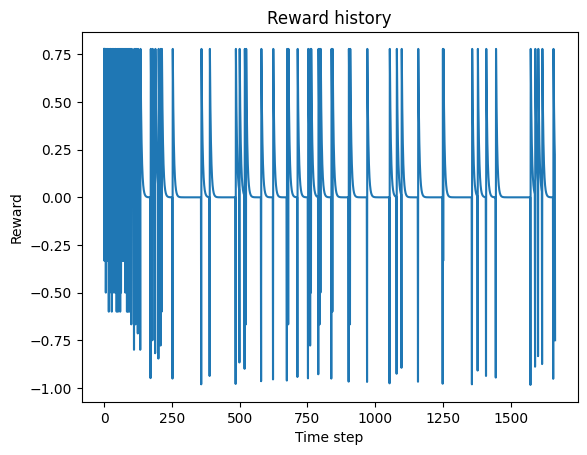

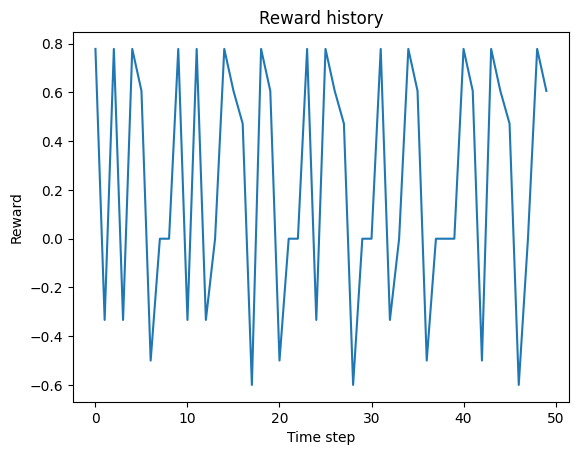

In [5]:
# plot the reward history from the first episode 
import matplotlib.pyplot as plt
import numpy as np

reward_hist = vec_env.get_attr("reward_hist_all_ep")[0][0]
reward_hist = np.array(reward_hist)
plt.plot(reward_hist)
plt.title("Reward history")
plt.xlabel("Time step")
plt.ylabel("Reward")
plt.show()

# now plot the reward history from the first episode, only the first 100 time steps
reward_hist = vec_env.get_attr("reward_hist_all_ep")[0][0]
reward_hist = np.array(reward_hist)
plt.plot(reward_hist[:50])
plt.title("Reward history")
plt.xlabel("Time step")
plt.ylabel("Reward")
plt.show()



Notes: 

Should prbably keep track of "c" history- it seems to always be .2 ish

As the episode goes on, it exploits more an more- see if this changes with longer travel time? If the c function is broken, changing this shouldnt do anything 

c is only used right after the agent chooses to leave 